In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [12]:
lcs_teams = pd.read_csv('../datasets/summer-playoffs/lcs/LCS 2020 Summer Playoffs - Team Stats - OraclesElixir.csv')
lck_teams = pd.read_csv('../datasets/summer-playoffs/lck/LCK 2020 Summer Playoffs - Team Stats - OraclesElixir.csv')
lec_teams = pd.read_csv('../datasets/summer-playoffs/lec/LEC 2020 Summer Playoffs - Team Stats - OraclesElixir.csv')
lpl_teams = pd.read_csv('../datasets/summer-playoffs/lpl/LPL 2020 Summer Playoffs - Team Stats - OraclesElixir.csv')

In [3]:
summer_teams = pd.concat([lcs_teams,lck_teams,lec_teams,lpl_teams], axis=0, ignore_index=True)
summer_teams

,Team,GP,W,L,AGT,K,D,KD,CKPM,GPR,...,FD%,DRG%,ELD%,FBN%,BN%,LNE%,JNG%,WPM,CWPM,WCPM
0,100 Thieves,3,0,3,34.7,22,60,0.37,0.79,-1.58,...,67%,46%,50%,0%,25%,49.2%,44.4%,3.34,1.29,1.31
1,Cloud9,11,5,6,34.1,159,155,1.03,0.84,-0.37,...,45%,39%,0%,36%,39%,50.2%,49.5%,3.21,1.18,1.21
2,Dignitas,3,0,3,31.5,20,43,0.47,0.67,-1.41,...,0%,46%,NaN,0%,0%,50.0%,46.6%,2.63,1.18,1.23
3,Evil Geniuses,11,5,6,34.3,138,157,0.88,0.78,-0.01,...,55%,47%,67%,45%,50%,49.3%,51.9%,3.35,1.35,1.40
4,FlyQuest,17,10,7,36.0,212,193,1.10,0.66,-0.01,...,53%,60%,40%,71%,64%,50.4%,49.7%,3.11,1.11,1.66
5,Golden Guardians,11,5,6,34.1,100,128,0.78,0.61,0.06,...,73%,53%,33%,55%,54%,50.2%,46.8%,3.36,1.35,1.60
6,Team Liquid,13,7,6,38.6,175,170,1.03,0.69,-0.02,...,38%,46%,25%,54%,50%,49.5%,50.6%,3.36,1.14,1.50
7,Team SoloMid,23,14,9,34.7,301,222,1.36,0.66,0.55,...,48%,51%,83%,39%,53%,50.3%,52.0%,3.51,1.34,1.47
8,Afreeca Freecs,6,2,4,28.2,54,111,0.49,0.98,-1.32,...,33%,30%,NaN,33%,33%,49.4%,48.2%,3.02,1.24,1.74
9,DAMWON Gaming,3,3,0,33.1,54,21,2.57,0.76,1.56,...,33%,79%,NaN,100%,75%,47.2%,56.8%,4.16,1.40,1.86


In [4]:
#checking missing values
summer_teams.isnull().sum()

Team     0
GP       0
W        0
L        0
AGT      0
K        0
D        0
KD       0
CKPM     0
GPR      0
GSPD     0
EGR      0
MLR      0
GD15     0
FB%      0
FT%      0
F3T%     0
HLD%     0
FD%      0
DRG%     0
ELD%    15
FBN%     0
BN%      0
LNE%     0
JNG%     0
WPM      0
CWPM     0
WCPM     0
dtype: int64

In [5]:
#Replacing missing values with '0%'
summer_teams.fillna('0%', inplace=True)

In [6]:
#split the dataframe by categorical and numerical variables
st_cat = summer_teams.select_dtypes(object)
st_num = summer_teams.select_dtypes(np.number)
print(st_num.head())
print(st_cat.head())

   GP   W  L   AGT    K    D    KD  CKPM   GPR   EGR   MLR  GD15   WPM  CWPM  \
0   3   0  3  34.7   22   60  0.37  0.79 -1.58  31.4 -31.4 -1798  3.34  1.29   
1  11   5  6  34.1  159  155  1.03  0.84 -0.37  41.6   3.8  -297  3.21  1.18   
2   3   0  3  31.5   20   43  0.47  0.67 -1.41  22.1 -22.1 -1832  2.63  1.18   
3  11   5  6  34.3  138  157  0.88  0.78 -0.01  44.8   0.6  -497  3.35  1.35   
4  17  10  7  36.0  212  193  1.10  0.66 -0.01  55.8   3.0   365  3.11  1.11   

   WCPM  
0  1.31  
1  1.21  
2  1.23  
3  1.40  
4  1.66  
            Team    GSPD  FB%  FT% F3T% HLD%  FD% DRG% ELD% FBN%  BN%   LNE%  \
0    100 Thieves   -7.0%  67%  33%   0%  50%  67%  46%  50%   0%  25%  49.2%   
1         Cloud9    0.2%  36%  45%  36%  45%  45%  39%   0%  36%  39%  50.2%   
2       Dignitas  -11.4%  33%  67%   0%  33%   0%  46%   0%   0%   0%  50.0%   
3  Evil Geniuses   -4.0%  45%  36%  64%  45%  55%  47%  67%  45%  50%  49.3%   
4       FlyQuest    1.9%  59%  47%  47%  56%  53%  60%  40%

In [8]:
winners_teams = ['Team SoloMid','G2 Esports','Gen.G','LGD Gaming'] #winners from respective region

In [9]:
winners = lambda x: 1 if x in winners_teams else 0

In [10]:
st_cat['WINNER'] = st_cat['Team'].apply(winners) #create label
st_cat

C:\Users\Beatriz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Team,GSPD,FB%,FT%,F3T%,HLD%,FD%,DRG%,ELD%,FBN%,BN%,LNE%,JNG%,WINNER
0,100 Thieves,-7.0%,67%,33%,0%,50%,67%,46%,50%,0%,25%,49.2%,44.4%,0
1,Cloud9,0.2%,36%,45%,36%,45%,45%,39%,0%,36%,39%,50.2%,49.5%,0
2,Dignitas,-11.4%,33%,67%,0%,33%,0%,46%,0%,0%,0%,50.0%,46.6%,0
3,Evil Geniuses,-4.0%,45%,36%,64%,45%,55%,47%,67%,45%,50%,49.3%,51.9%,0
4,FlyQuest,1.9%,59%,47%,47%,56%,53%,60%,40%,71%,64%,50.4%,49.7%,0
5,Golden Guardians,-4.1%,64%,27%,27%,50%,73%,53%,33%,55%,54%,50.2%,46.8%,0
6,Team Liquid,2.1%,31%,77%,54%,63%,38%,46%,25%,54%,50%,49.5%,50.6%,0
7,Team SoloMid,3.5%,57%,57%,74%,45%,48%,51%,83%,39%,53%,50.3%,52.0%,1
8,Afreeca Freecs,-12.1%,17%,17%,33%,25%,33%,30%,0%,33%,33%,49.4%,48.2%,0
9,DAMWON Gaming,11.8%,67%,100%,100%,83%,33%,79%,0%,100%,75%,47.2%,56.8%,0


In [11]:
st_cat = st_cat.drop('Team', axis=1)

In [12]:
st_cat

,GSPD,FB%,FT%,F3T%,HLD%,FD%,DRG%,ELD%,FBN%,BN%,LNE%,JNG%,WINNER
0,-7.0%,67%,33%,0%,50%,67%,46%,50%,0%,25%,49.2%,44.4%,0
1,0.2%,36%,45%,36%,45%,45%,39%,0%,36%,39%,50.2%,49.5%,0
2,-11.4%,33%,67%,0%,33%,0%,46%,0%,0%,0%,50.0%,46.6%,0
3,-4.0%,45%,36%,64%,45%,55%,47%,67%,45%,50%,49.3%,51.9%,0
4,1.9%,59%,47%,47%,56%,53%,60%,40%,71%,64%,50.4%,49.7%,0
5,-4.1%,64%,27%,27%,50%,73%,53%,33%,55%,54%,50.2%,46.8%,0
6,2.1%,31%,77%,54%,63%,38%,46%,25%,54%,50%,49.5%,50.6%,0
7,3.5%,57%,57%,74%,45%,48%,51%,83%,39%,53%,50.3%,52.0%,1
8,-12.1%,17%,17%,33%,25%,33%,30%,0%,33%,33%,49.4%,48.2%,0
9,11.8%,67%,100%,100%,83%,33%,79%,0%,100%,75%,47.2%,56.8%,0


In [13]:
y = st_cat['WINNER'] #the label we want to predict

In [14]:
st_cat = st_cat.drop('WINNER', axis=1)

In [15]:
#remove '%' symbol
def transform_percent(df):
    for c in range(len(df.columns)):
        for l in range(df.shape[0]):
            df.iloc[:,c][l] = df.iloc[:,c][l][:-1] 
    return df 

In [16]:
transform_percent(st_cat)
st_cat

,GSPD,FB%,FT%,F3T%,HLD%,FD%,DRG%,ELD%,FBN%,BN%,LNE%,JNG%
0,-7.0,67,33,0,50,67,46,50,0,25,49.2,44.4
1,0.2,36,45,36,45,45,39,0,36,39,50.2,49.5
2,-11.4,33,67,0,33,0,46,0,0,0,50.0,46.6
3,-4.0,45,36,64,45,55,47,67,45,50,49.3,51.9
4,1.9,59,47,47,56,53,60,40,71,64,50.4,49.7
5,-4.1,64,27,27,50,73,53,33,55,54,50.2,46.8
6,2.1,31,77,54,63,38,46,25,54,50,49.5,50.6
7,3.5,57,57,74,45,48,51,83,39,53,50.3,52.0
8,-12.1,17,17,33,25,33,30,0,33,33,49.4,48.2
9,11.8,67,100,100,83,33,79,0,100,75,47.2,56.8


In [17]:
#transform str features into float
st_cat = st_cat.astype('float64') 

In [18]:
st_f = pd.concat([st_cat,st_num],axis=1)
st_f

,GSPD,FB%,FT%,F3T%,HLD%,FD%,DRG%,ELD%,FBN%,BN%,...,D,KD,CKPM,GPR,EGR,MLR,GD15,WPM,CWPM,WCPM
0,-7.0,67.0,33.0,0.0,50.0,67.0,46.0,50.0,0.0,25.0,...,60,0.37,0.79,-1.58,31.4,-31.4,-1798,3.34,1.29,1.31
1,0.2,36.0,45.0,36.0,45.0,45.0,39.0,0.0,36.0,39.0,...,155,1.03,0.84,-0.37,41.6,3.8,-297,3.21,1.18,1.21
2,-11.4,33.0,67.0,0.0,33.0,0.0,46.0,0.0,0.0,0.0,...,43,0.47,0.67,-1.41,22.1,-22.1,-1832,2.63,1.18,1.23
3,-4.0,45.0,36.0,64.0,45.0,55.0,47.0,67.0,45.0,50.0,...,157,0.88,0.78,-0.01,44.8,0.6,-497,3.35,1.35,1.40
4,1.9,59.0,47.0,47.0,56.0,53.0,60.0,40.0,71.0,64.0,...,193,1.10,0.66,-0.01,55.8,3.0,365,3.11,1.11,1.66
5,-4.1,64.0,27.0,27.0,50.0,73.0,53.0,33.0,55.0,54.0,...,128,0.78,0.61,0.06,54.6,-9.2,58,3.36,1.35,1.60
6,2.1,31.0,77.0,54.0,63.0,38.0,46.0,25.0,54.0,50.0,...,170,1.03,0.69,-0.02,52.2,1.6,229,3.36,1.14,1.50
7,3.5,57.0,57.0,74.0,45.0,48.0,51.0,83.0,39.0,53.0,...,222,1.36,0.66,0.55,54.8,6.1,427,3.51,1.34,1.47
8,-12.1,17.0,17.0,33.0,25.0,33.0,30.0,0.0,33.0,33.0,...,111,0.49,0.98,-1.32,32.7,7.3,-1735,3.02,1.24,1.74
9,11.8,67.0,100.0,100.0,83.0,33.0,79.0,0.0,100.0,75.0,...,21,2.57,0.76,1.56,67.9,32.1,1663,4.16,1.40,1.86


In [19]:
st_f = st_f.drop(['GP','W','L','K','D'], axis=1)

In [20]:
st_f

,GSPD,FB%,FT%,F3T%,HLD%,FD%,DRG%,ELD%,FBN%,BN%,...,AGT,KD,CKPM,GPR,EGR,MLR,GD15,WPM,CWPM,WCPM
0,-7.0,67.0,33.0,0.0,50.0,67.0,46.0,50.0,0.0,25.0,...,34.7,0.37,0.79,-1.58,31.4,-31.4,-1798,3.34,1.29,1.31
1,0.2,36.0,45.0,36.0,45.0,45.0,39.0,0.0,36.0,39.0,...,34.1,1.03,0.84,-0.37,41.6,3.8,-297,3.21,1.18,1.21
2,-11.4,33.0,67.0,0.0,33.0,0.0,46.0,0.0,0.0,0.0,...,31.5,0.47,0.67,-1.41,22.1,-22.1,-1832,2.63,1.18,1.23
3,-4.0,45.0,36.0,64.0,45.0,55.0,47.0,67.0,45.0,50.0,...,34.3,0.88,0.78,-0.01,44.8,0.6,-497,3.35,1.35,1.40
4,1.9,59.0,47.0,47.0,56.0,53.0,60.0,40.0,71.0,64.0,...,36.0,1.10,0.66,-0.01,55.8,3.0,365,3.11,1.11,1.66
5,-4.1,64.0,27.0,27.0,50.0,73.0,53.0,33.0,55.0,54.0,...,34.1,0.78,0.61,0.06,54.6,-9.2,58,3.36,1.35,1.60
6,2.1,31.0,77.0,54.0,63.0,38.0,46.0,25.0,54.0,50.0,...,38.6,1.03,0.69,-0.02,52.2,1.6,229,3.36,1.14,1.50
7,3.5,57.0,57.0,74.0,45.0,48.0,51.0,83.0,39.0,53.0,...,34.7,1.36,0.66,0.55,54.8,6.1,427,3.51,1.34,1.47
8,-12.1,17.0,17.0,33.0,25.0,33.0,30.0,0.0,33.0,33.0,...,28.2,0.49,0.98,-1.32,32.7,7.3,-1735,3.02,1.24,1.74
9,11.8,67.0,100.0,100.0,83.0,33.0,79.0,0.0,100.0,75.0,...,33.1,2.57,0.76,1.56,67.9,32.1,1663,4.16,1.40,1.86


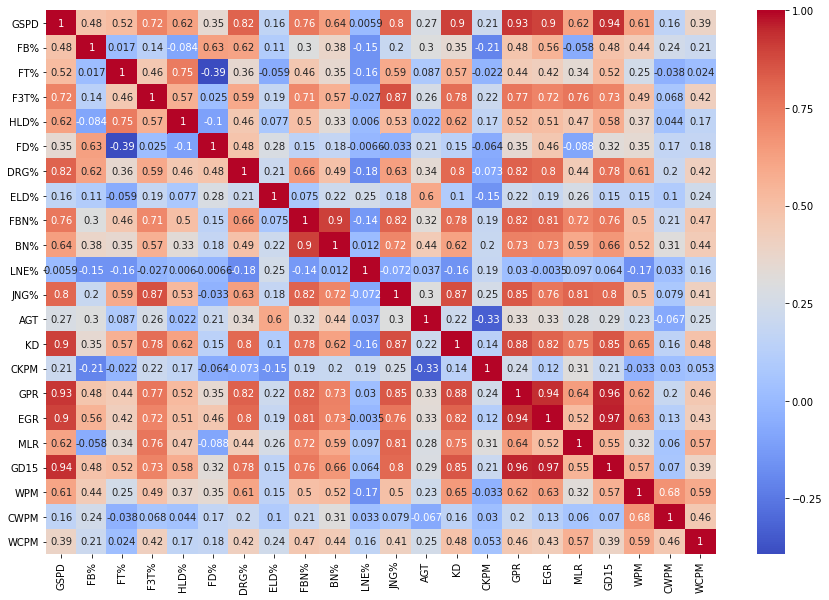

In [21]:
#plotting correlation
plt.subplots(figsize=(15,10))
sns.heatmap(st_f.corr(),annot = True,cmap='coolwarm');

In [22]:
#droping high correlated features
st_f = st_f.drop(['EGR','GD15'], axis=1)

In [23]:
X = st_f

In [28]:
smt = SMOTE(k_neighbors=3)

In [29]:
X, y = smt.fit_sample(X, y)

In [30]:
X_train, X_val, y_train ,y_val  = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.head()

,GSPD,FB%,FT%,F3T%,HLD%,FD%,DRG%,ELD%,FBN%,BN%,LNE%,JNG%,AGT,KD,CKPM,GPR,MLR,WPM,CWPM,WCPM
6,2.100000,31.00000,77.000000,54.000000,63.000000,38.00000,46.00000,25.000000,54.000000,50.000000,49.500000,50.600000,38.600000,1.030000,0.690000,-0.020000,1.600000,3.360000,1.140000,1.500000
24,-5.500000,50.00000,50.000000,50.000000,50.000000,50.00000,42.00000,0.000000,33.000000,33.000000,50.100000,46.900000,29.600000,0.460000,0.750000,-1.170000,-15.400000,3.150000,1.440000,1.460000
32,3.266234,43.87063,53.956877,65.136697,66.025225,60.64036,60.82018,62.420662,48.366967,46.956877,50.720505,50.205045,33.844589,1.221945,0.918202,0.553963,10.155736,3.450073,1.348885,1.370757
19,-2.900000,75.00000,50.000000,0.000000,25.000000,50.00000,44.00000,0.000000,67.000000,80.000000,49.100000,48.300000,32.100000,0.660000,0.840000,-0.360000,-19.200000,3.380000,1.580000,1.230000
17,-1.000000,64.00000,82.000000,45.000000,59.000000,45.00000,43.00000,0.000000,55.000000,62.000000,49.100000,49.300000,32.400000,1.090000,0.850000,-0.080000,-6.500000,2.890000,1.030000,1.130000


In [31]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(36, 20)
(10, 20)
(36,)
(10,)


In [32]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)

In [33]:
LR = LogisticRegression()
DT = DecisionTreeClassifier(random_state=42) 
RF = RandomForestClassifier(n_estimators=100, random_state=42)

In [34]:
LR_fit = LR.fit(X_train, y_train)
DT_fit = DT.fit(X_train, y_train)
RF_fit = RF.fit(X_train, y_train)

In [35]:
LR_pred = LR_fit.predict(X_val)
DT_pred = DT_fit.predict(X_val)
RF_pred = RF_fit.predict(X_val)

In [36]:
print("Logistic Regression accuracy: %f " % (accuracy_score(LR_pred, y_val)*100))
print("Decision Tree accuracy: %f " % (accuracy_score(DT_pred, y_val)*100))
print("Random Forest accuracy: %f " % (accuracy_score(RF_pred, y_val)*100))

Logistic Regression accuracy: 70.000000 
Decision Tree accuracy: 60.000000 
Random Forest accuracy: 90.000000 


In [38]:
print(classification_report(RF_pred, y_val))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.80      0.89         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



In [41]:
worlds_teams = pd.read_csv('datasets/worlds/Worlds 2020 Play-In - Team Stats - OraclesElixir.csv')
worlds_teams

,Team,GP,W,L,AGT,K,D,KD,CKPM,GPR,...,FD%,DRG%,ELD%,FBN%,BN%,LNE%,JNG%,WPM,CWPM,WCPM
0,INTZ,5,1,4,36.3,53,71,0.75,0.68,-1.29,...,80%,46%,0%,40%,38%,49.0%,45.7%,3.67,1.36,1.58
1,Legacy Esports,8,3,5,31.1,98,114,0.86,0.85,-0.54,...,38%,33%,100%,50%,67%,47.9%,48.6%,2.99,1.14,1.15
2,LGD Gaming,11,8,3,33.2,151,119,1.27,0.74,1.57,...,45%,55%,33%,64%,53%,51.3%,54.8%,3.32,1.14,1.72
3,MAD Lions,10,4,6,33.5,117,164,0.71,0.84,-0.55,...,30%,43%,NaN,30%,40%,50.5%,49.5%,3.27,1.36,1.36
4,PSG Talon,5,4,1,32.7,94,36,2.61,0.79,-0.04,...,60%,70%,NaN,60%,67%,50.5%,51.8%,3.12,1.23,1.78
5,Rainbow7,7,2,5,32.7,76,106,0.72,0.79,-0.94,...,43%,37%,50%,29%,38%,49.4%,46.8%,3.41,1.46,1.59
6,SuperMassive Esports,12,5,7,31.5,162,173,0.94,0.89,-0.11,...,67%,52%,NaN,33%,31%,49.8%,49.7%,3.01,1.18,1.16
7,Team Liquid,5,4,1,29.8,83,35,2.37,0.79,1.81,...,60%,68%,NaN,60%,60%,52.2%,52.4%,2.82,1.15,1.24
8,Unicorns Of Love.CIS,8,6,2,31.7,138,106,1.30,0.96,0.94,...,50%,72%,100%,75%,82%,49.9%,53.1%,3.16,1.04,1.48
9,V3 Esports,5,1,4,32.2,51,100,0.51,0.94,-1.64,...,40%,30%,NaN,20%,29%,49.3%,43.0%,3.26,1.34,1.47


In [42]:
wt = worlds_teams.drop(['Team','GP','W','L','K','D','EGR','GD15'], axis=1)

In [43]:
wt.isnull().sum()

AGT     0
KD      0
CKPM    0
GPR     0
GSPD    0
MLR     0
FB%     0
FT%     0
F3T%    0
HLD%    0
FD%     0
DRG%    0
ELD%    5
FBN%    0
BN%     0
LNE%    0
JNG%    0
WPM     0
CWPM    0
WCPM    0
dtype: int64

In [44]:
wt.fillna('0%', inplace=True)

In [45]:
wt_cat = wt.select_dtypes(object)
wt_num = wt.select_dtypes(np.number)

In [46]:
wt_cat

,GSPD,FB%,FT%,F3T%,HLD%,FD%,DRG%,ELD%,FBN%,BN%,LNE%,JNG%
0,-5.2%,40%,40%,20%,60%,80%,46%,0%,40%,38%,49.0%,45.7%
1,-4.4%,25%,38%,38%,63%,38%,33%,100%,50%,67%,47.9%,48.6%
2,7.5%,91%,73%,91%,64%,45%,55%,33%,64%,53%,51.3%,54.8%
3,-3.8%,50%,30%,50%,35%,30%,43%,0%,30%,40%,50.5%,49.5%
4,2.6%,40%,40%,40%,50%,60%,70%,0%,60%,67%,50.5%,51.8%
5,-5.4%,14%,43%,14%,43%,43%,37%,50%,29%,38%,49.4%,46.8%
6,-2.9%,67%,50%,33%,33%,67%,52%,0%,33%,31%,49.8%,49.7%
7,12.2%,40%,60%,80%,60%,60%,68%,0%,60%,60%,52.2%,52.4%
8,8.3%,63%,75%,88%,63%,50%,72%,100%,75%,82%,49.9%,53.1%
9,-10.0%,20%,40%,20%,40%,40%,30%,0%,20%,29%,49.3%,43.0%


In [47]:
transform_percent(wt_cat)

,GSPD,FB%,FT%,F3T%,HLD%,FD%,DRG%,ELD%,FBN%,BN%,LNE%,JNG%
0,-5.2,40,40,20,60,80,46,0,40,38,49.0,45.7
1,-4.4,25,38,38,63,38,33,100,50,67,47.9,48.6
2,7.5,91,73,91,64,45,55,33,64,53,51.3,54.8
3,-3.8,50,30,50,35,30,43,0,30,40,50.5,49.5
4,2.6,40,40,40,50,60,70,0,60,67,50.5,51.8
5,-5.4,14,43,14,43,43,37,50,29,38,49.4,46.8
6,-2.9,67,50,33,33,67,52,0,33,31,49.8,49.7
7,12.2,40,60,80,60,60,68,0,60,60,52.2,52.4
8,8.3,63,75,88,63,50,72,100,75,82,49.9,53.1
9,-10.0,20,40,20,40,40,30,0,20,29,49.3,43.0


In [48]:
wt_cat = wt_cat.astype('float64') 

In [49]:
wt_f = pd.concat([wt_cat,wt_num],axis=1)
wt_f

,GSPD,FB%,FT%,F3T%,HLD%,FD%,DRG%,ELD%,FBN%,BN%,LNE%,JNG%,AGT,KD,CKPM,GPR,MLR,WPM,CWPM,WCPM
0,-5.2,40.0,40.0,20.0,60.0,80.0,46.0,0.0,40.0,38.0,49.0,45.7,36.3,0.75,0.68,-1.29,-9.8,3.67,1.36,1.58
1,-4.4,25.0,38.0,38.0,63.0,38.0,33.0,100.0,50.0,67.0,47.9,48.6,31.1,0.86,0.85,-0.54,-0.6,2.99,1.14,1.15
2,7.5,91.0,73.0,91.0,64.0,45.0,55.0,33.0,64.0,53.0,51.3,54.8,33.2,1.27,0.74,1.57,2.1,3.32,1.14,1.72
3,-3.8,50.0,30.0,50.0,35.0,30.0,43.0,0.0,30.0,40.0,50.5,49.5,33.5,0.71,0.84,-0.55,1.1,3.27,1.36,1.36
4,2.6,40.0,40.0,40.0,50.0,60.0,70.0,0.0,60.0,67.0,50.5,51.8,32.7,2.61,0.79,-0.04,33.1,3.12,1.23,1.78
5,-5.4,14.0,43.0,14.0,43.0,43.0,37.0,50.0,29.0,38.0,49.4,46.8,32.7,0.72,0.79,-0.94,-15.9,3.41,1.46,1.59
6,-2.9,67.0,50.0,33.0,33.0,67.0,52.0,0.0,33.0,31.0,49.8,49.7,31.5,0.94,0.89,-0.11,-12.4,3.01,1.18,1.16
7,12.2,40.0,60.0,80.0,60.0,60.0,68.0,0.0,60.0,60.0,52.2,52.4,29.8,2.37,0.79,1.81,6.4,2.82,1.15,1.24
8,8.3,63.0,75.0,88.0,63.0,50.0,72.0,100.0,75.0,82.0,49.9,53.1,31.7,1.30,0.96,0.94,15.5,3.16,1.04,1.48
9,-10.0,20.0,40.0,20.0,40.0,40.0,30.0,0.0,20.0,29.0,49.3,43.0,32.2,0.51,0.94,-1.64,-8.2,3.26,1.34,1.47


In [51]:
X_test = scaler.fit_transform(wt_f)

In [59]:
RF_predw = RF_fit.predict(X_test)

In [62]:
pred = pd.concat([worlds_teams['Team'],pd.DataFrame(RF_predw)],axis=1)
pred

,Team,0
0,INTZ,0
1,Legacy Esports,0
2,LGD Gaming,1
3,MAD Lions,0
4,PSG Talon,1
5,Rainbow7,0
6,SuperMassive Esports,0
7,Team Liquid,1
8,Unicorns Of Love.CIS,1
9,V3 Esports,0
